<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css">

<div class='text-center text-danger bg-warning container'><h1>Undestanding Best Strategy to Enter Mobile Phone App Market</h1></div>
<div class='text-center text-danger bg-warning container'><h6><u>19 Sep 2018</u></h6></div>
<div class='text-center text-danger bg-warning container'>&#160;</div>


<h4> Table of contents </h4>
<ol>
    <li>Data cleaning and preparation</li>
    <li>Approach 1: Identify potential market: high demand and low performing categories</li>
    <li>Approach 2: Identify impact of price on the average rating of an app</li>
    <li>Approach 3: App prices across countries</li>
    <li>Approach 4: Purchase behaviour based on platforms</li>
    <li>Approach 5: Impact of in-app advertisements and purchases on rating</li>
</ol>


 
<hr>
<h2>Data cleaning and preparation</h2>
1. To start we noticed that the average_rating column had values of 50 in it. This did not make sense as the rest of the values range between 0 and 5. We made the assumption these values of 50 should be 5.0
2. Next we looked at the different categories available. There were weird encodings and a few categories that could be aggregatd into one of the larger categories.
3. Then we converted the crawl and release dates to native R date types and used this to calculate the app age as there were missing values.
4. We noticed there were some apps priced very high. We decided to only look at apps that are less than &#36;100 as these high-priced apps are either errors in the data or very niche apps which we did not want to analyze.
5. There were NAs present in the region column. Given the low total number of NAs, we decided to remove these rows.
6. Finally we aggregated the dataset to form rows on a per app basis.

<blockquote>
<div class = 'text-danger'>Important note: Games Category</div>
We observed that highest number of applictions across any cross section of the data are games. Game applications in itself is a competitive segment. Additionally, game applications differ from other application categories on many fronts such as:
    <ol>
        <li>Application size due to high graphics files</li>
        <li>Higher development cost</li>
        <li>Difficult to maintain high app rating while providing compatibility across various devices and platforms</li>
    </ol><br>
Hence we recommend to exclude games category as initial scope for entering the market.
    
</blockquote>

In [21]:
##### Load the libraries and read data
rm(list = ls())
library(data.table)
library(ggplot2)
library(plotly)
library(corrplot)
library(repr)
library(dplyr)
options(repr.plot.width=8, repr.plot.height=4)
options(warn = -1)
setwd("G:\\Team Drives\\MSBA 6410 - Exploratory Data Analytics and Visualization\\Data and Code")
mobile <- read.csv("mobileApps.csv")
wrapper <- function(x, ...) paste(strwrap(x, ...), collapse = "\n")

##### Data cleaning

# Removing special characters
mobile$category <- gsub(' åÊ', '', mobile$category)
# Changing average rating 50 to 5.0 based on intuition
mobile[which(mobile$average_rating == 50), 'average_rating'] <- 5.0
# Setting right date formats
mobile$crawl_date <- as.Date(mobile$crawl_date, '%m/%d/%y')
mobile$release_date <- as.Date(mobile$release_date, '%m/%d/%y')
# Calculating missing app ages
mobile$app_age_current_version <- ifelse(is.na(mobile$app_age_current_version), mobile$crawl_date - mobile$release_date, mobile$app_age_current_version)
# Merging subcategories with main categories
mobile$category <- gsub("([A-Za-z]+).*", "\\1", mobile$category)
# Removing region 'na' as data proportion is very low
mobile_cleaned <- mobile[which(!is.na(mobile$region)),]
# Removing outlier priecd apps
mobile_cleaned <- mobile_cleaned[which(mobile_cleaned$price < 100), ]
# write.csv(mobile_cleaned, 'mobile_cleaned.csv', row.names = FALSE)


<hr>
<h2>Approach 1</h2>
<h4><i>Explanation and goals</i></h4>

In the initial approach, our key goal is identify the mobile applications that we can categorise as `the ones that are in demand (determined by high number of ratings the apps are getting) however, are not able to meet user expectations (determined by low average rating given to these apps)`. The basic rationale behind this is that consumers will download the apps that they find interesting/usefull more times leading to proportionally higher number of ratings given, but at the same time the average rating given will turn out to be low if it doesn't meet the expected qality of service.
The category & platform (OS and store) which such apps belong to will be defined as the 'potential market' for us. We will be able to safely assume that the segments determined by these apps require better service.

<b>Key goal:</b>
Identify the market segments that currently represent applications with high customer engagement but low satisfaction


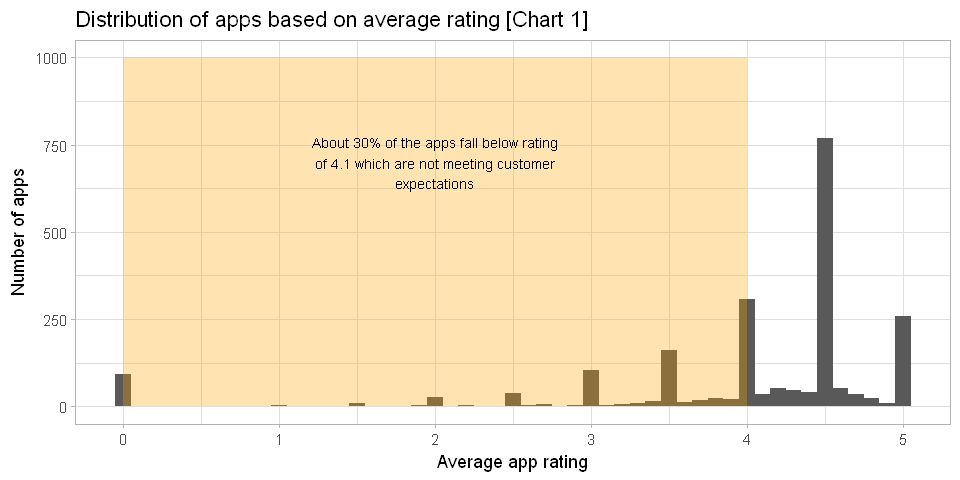

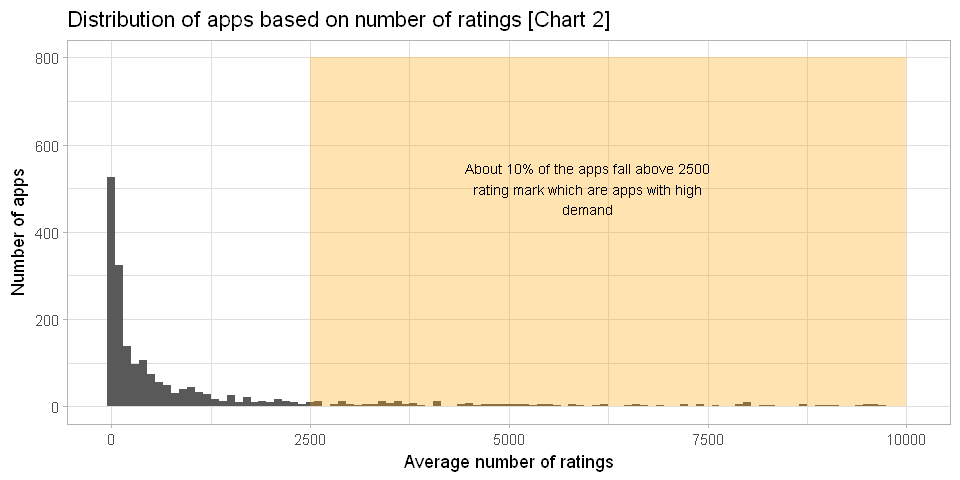

Category,Average_Ratings_Per_App
Multimedia,29842.706
Education,5862.667
Utilities,6535.312
Entertainment,11632.826
Social,195551.214
Lifestyle,8204.000


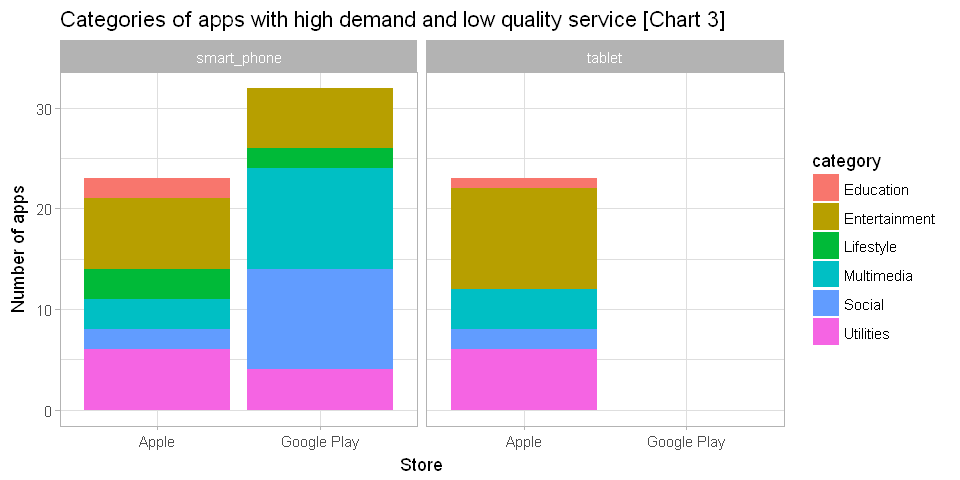

In [22]:
##### Initial - Aggregating 6 day data to app level
# One app is defined by release date, developer, device, category and store
mobile_cleaned <- data.table(mobile_cleaned)
mobile_cleaned_proc <- mobile_cleaned[,j = list(mean(filesize..MB.), max(rating_count), sum(num_issues_reported), mean(price), mean(average_rating), mean(rank)),
                                      by = list(release_date, category, app_store, device, in_app_ads, in_app_purchase, app_type, region, developer)]
colnames(mobile_cleaned_proc)[10:15] <- c("size_mean", "numratings_max", "issues_sum", "price_mean", "rating_mean", "rank_mean")
mobile_cleaned_proc <- mobile_cleaned_proc[category != 'Games']
# write.csv(mobile_cleaned_proc, 'Aggregated_apps.csv', row.names = FALSE)

##### Approach 1

# Finding threshold for average rating
ggplot(data = mobile_cleaned_proc, aes(rating_mean)) +
  geom_histogram(binwidth = 0.1) +
  annotate('rect', xmin = 0, xmax = 4, ymin = 0, ymax = 1000, fill = 'orange', alpha = 0.3) +
  annotate('text', size = 3, x = 2, y = 700, label = wrapper('About 30% of the apps fall below rating of 4.1 which are not meeting customer expectations', width = 40)) +
  xlab('Average app rating') +
  ylab('Number of apps') +
  ggtitle('Distribution of apps based on average rating [Chart 1]') +
  theme_light()

# Finding threshold for number of ratings given (excluding outliers upfront to view lower distribution)
ggplot(data = mobile_cleaned_proc[which(mobile_cleaned_proc$numratings_max <= 10000),], aes(numratings_max)) +
  geom_histogram(binwidth = 100) +
  annotate('rect', xmin = 2500, xmax = 10000, ymin = 0, ymax = 800, fill = 'orange', alpha = 0.3) +
  annotate('text', size = 3, x = 6000, y = 500, label = wrapper('About 10% of the apps fall above 2500 rating mark which are apps with high demand', width = 40)) +
  xlab('Average number of ratings') +
  ylab('Number of apps') +
  ggtitle('Distribution of apps based on number of ratings [Chart 2]') +
  theme_light()

# Inference: # The distribution is highly skewed but overall apps with more than 2500 ratings can be called the one with high traction 

# Observing categoris of high demand, low service apps
analysis_1 <- mobile_cleaned_proc[numratings_max >= 2500 & rating_mean <= 4.0]
ggplot(data = analysis_1, aes(app_store, fill = category)) +
  geom_histogram(stat = 'count') +
  facet_wrap('device') +
  xlab('Store') +
  ylab('Number of apps') +
  ggtitle('Categories of apps with high demand and low quality service [Chart 3]') +
  theme_light()

# Determining best catgories to pick based on where we observe more potential downloads
downloads_check <- analysis_1[, j = mean(numratings_max), by = category]
colnames(downloads_check) <- c('Category', 'Average_Ratings_Per_App')
downloads_check

<h4><i>Interpretation of approach 1</i></h4>
1. Based on chart 1 and 2, we can infer that apps that have average rating less than or equal to 4.0 and number of ratings given is more than 2.5K meet the criteria of 'opportunity segment'
2. From chart 3, we can observe that:
    1. `Apple store` for smartphones has significant number of apps in `Utilities, multimedia and entertainment categories` have room for better quality apps
    2. `Social, multimedia, entertainment and utilities categories` in `Google play` store for smartphone market have room for better quality apps
    3. `IOS tablet` market has a number of apps that need improvement in the `utilities, multimedia and entertainment` categories
3. Based on above Multimedia, Entertainment and Utilities catgories need improvement across all devices and platforms
4. However, from the table we can observe that, `Utilities` category has `lesser demand` from users (6.5K) as compared to Multimedia (30K) and Entertainment (11.6K) categories 

<h4><i>Conclusion from approach 1</i></h4>
1. Potential growth segment has been identified as `Multimedia and Entertainment` applications

<h4><i>Potential drawbacks</i></h4>
There could already be successful apps providing equivalent service however since we do not have visibility to app description or tags we cannot gather information about them.

<h4><i>Based on conclusions from Approach 1, explanation of Approach and Goals 2</i></h4>
Now that we have identified the two categories, we wanted to first look at how the market responds to price. Does raising the price affect the ratings of an app?


<hr>

<h2>Approach 2</h2>
<h4><i>Explanation and goals</i></h4>

Analysing affect of app pricing on average rating will help us formulate a pricing strategy for entering these segments.

<b>Key goal:</b> Identify relationship between price of an app and ratings

[1] "Effect of price on app rating"



Call:
lm(formula = rating_mean ~ price_mean, data = analysis_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1729 -0.1832  0.3168  0.3374  1.2749 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.183182   0.015808 264.632   <2e-16 ***
price_mean  -0.010647   0.004249  -2.506   0.0123 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.684 on 2101 degrees of freedom
Multiple R-squared:  0.002979,	Adjusted R-squared:  0.002504 
F-statistic: 6.278 on 1 and 2101 DF,  p-value: 0.0123


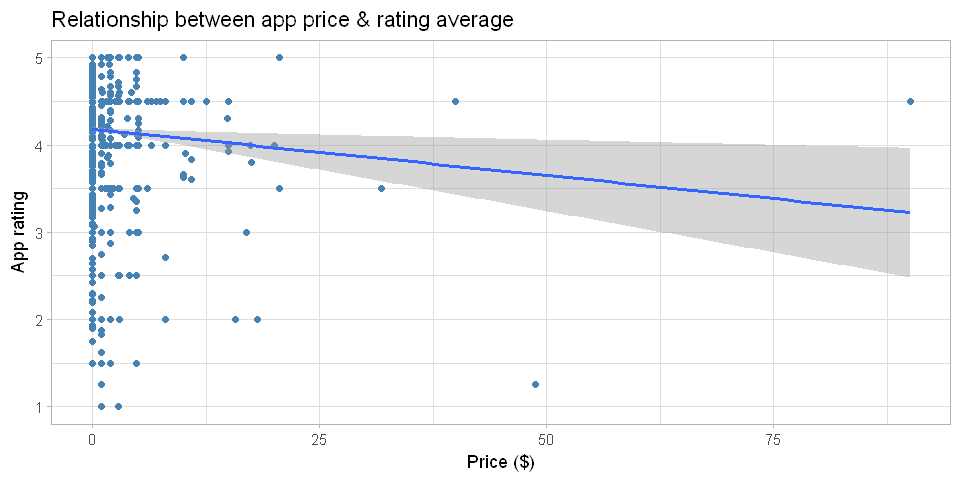

In [23]:
# Observing relation for all the apps which have been given rating
print("Effect of price on app rating")
analysis_2 <- mobile_cleaned_proc[rating_mean > 0]
ggplot(data = analysis_2, aes(x = price_mean, y = rating_mean)) +
  geom_point(color = 'steel blue') +
  geom_smooth(method = 'lm', formula = y ~ x) +
  xlab('Price ($)') +
  ylab('App rating') +
  ggtitle('Relationship between app price & rating average') +
  theme_light()

reg1 <- lm(rating_mean ~ price_mean, data = analysis_2)
summary(reg1)

# print("Effect of price on app rating considering apps with price less than $10")
# analysis_2 <- mobile_cleaned_proc[rating_mean <= 4.0 & rating_mean > 0 & category %in% c('Multimedia', 'Entertainment') & numratings_max >= 2500 & price_mean <= 10]
# nrow(analysis_2)
# ggplot(data = analysis_2, aes(x = price_mean, y = rating_mean)) +
#   geom_point(color = 'steel blue') +
#   geom_smooth(method = 'lm', formula = y ~ x) +
#   xlab('Price ($)') +
#   ylab('App rating') +
#   ggtitle('Relationship between app price & rating average') +
#   theme_light()
# 
# reg1 <- lm(rating_mean ~ price_mean, data = analysis_2)
# summary(reg1)


<h4><i>Interpretation of approach 2</i></h4>
The first graph and regression considers every app in the dataset, which ranges from free to $100. The p-value is 0.0123 which means that assuming there is no relationship between price and rating, there is essentially no chance of obtaining this sample. In addition, the coefficient is -0.01. This means for every dollar increase in app price, the rating falls 0.01 units.
The same relationship is supported by scatter plot. 

<h4><i>Conclusion from approach 2</i></h4>
There is evidence of a relationship between price of an app and its rating. In addition, that relationship is negative. This means as the price of the app increases, one would expect the rating to decrease. Ultimately, this means that to obtain a good app rating, which is a way to differentiate within the Entertainment and Multimedia categories, the price should be kept low

<h4><i>Based on conclusions from Approach 2, explanation of Approach and Goals 3:</i></h4>
Now that we have determined that price is important to obtain a good rating, we wanted to determine if the United States and China have different behavior when it comes to price.

<hr>

<h2>Approach 3</h2>
<h4><i>Explanation and goals</i></h4>

Identifying regional pricing patterns will help us device a pricing strategy while entering these markets

<b>Key goal:</b> Identify relationship between app pricing and region

             Df Sum Sq Mean Sq F value   Pr(>F)    
region        1   47.6   47.61   11.47 0.000756 ***
Residuals   584 2424.9    4.15                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

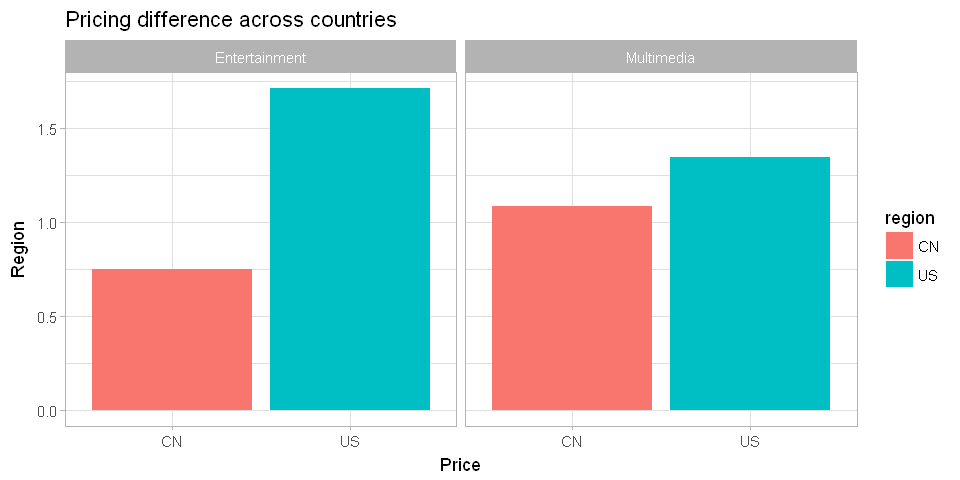

In [24]:
analysis_99 <- mobile_cleaned_proc[which(mobile_cleaned_proc$category %in% c('Entertainment', 'Multimedia')), c("region", "price_mean", "category")]
price_aov <- aov(price_mean ~ region, data=analysis_99)
summary(price_aov)

analysis_99 %>%
  group_by(category, region) %>%
  summarise(price = mean(price_mean)) %>%
  ggplot(aes(x=region, y=price, fill=region)) + geom_col() + facet_wrap('category') + xlab('Price') + ylab('Region') + ggtitle('Pricing difference across countries') +theme_light()


<h4><i>Interperation from Approach</i></h4>

The ANOVA compares the average price of all apps in China to the average price of all apps in the United States. Based on the p-value, there is a 0.07 percent chance of obtaining this sample if there is no difference in the average price of apps in each country. Further, from the graph we can observe that United States users pay, on average more than Chinese users.

<h4><i>Conclusions from Approach</i></h4>

From the above we can conlude that overall Chinese customers are sensitive to price, in addition, there is a clear opportunity to offer a quality app at a lower price to the United State market.

<h4><i>Based on conclusions from Approach 3, explanation of Approach and Goals 4</i></h4>

Now that we have observed a difference between Chinese and American users when it comes to price, we also wanted to see if there is a difference between Apple App Store and Google Play Store users.

<hr>

<h2>Approach 4</h2>
<h4><i>Explanation and goals</i></h4>

Identifying purchase behavior for Apple vs Google Play Store users will help us in pricing the apps appropriately for each platform

<b>Key goal:</b> Identify relationship between platform and app price

             Df Sum Sq Mean Sq F value Pr(>F)
app_store     1    8.9   8.931   2.117  0.146
Residuals   584 2463.6   4.218               

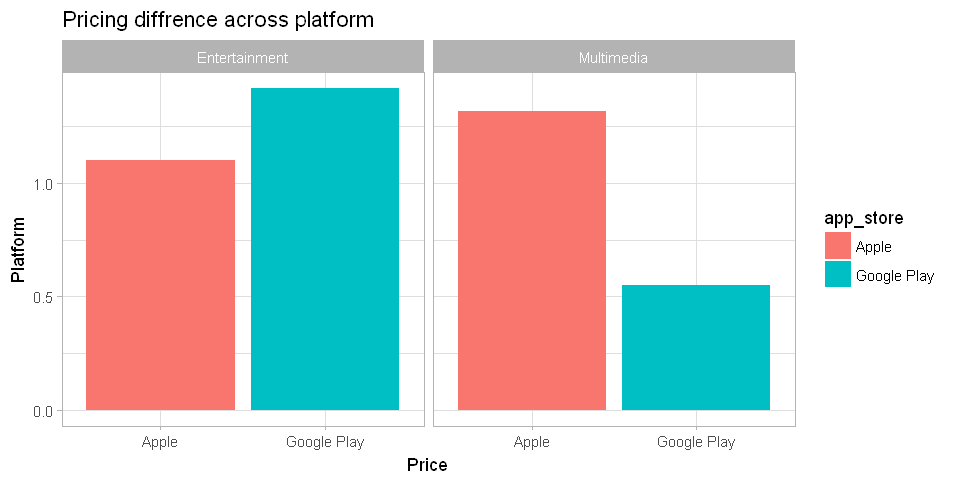

In [25]:
analysis_100 <- mobile_cleaned_proc[which(mobile_cleaned_proc$category %in% c('Entertainment', 'Multimedia')), c("app_store", "price_mean", "category")]
price_aov <- aov(price_mean ~ app_store, data=analysis_100)
summary(price_aov)

analysis_100 %>%
  group_by(category, app_store) %>%
  summarise(price = mean(price_mean)) %>%
  ggplot(aes(x=app_store, y=price, fill=app_store)) + geom_col() + facet_wrap('category') + xlab('Price') + ylab('Platform') + ggtitle('Pricing diffrence across platform')+theme_light()


<h4><i>Interperation from Approach</i></h4>

From the graph above we can see that Apple users, on average, spend more than Google Play users in Multimedia. In case of Entertainment, users spend more in Google Play store compared to Apple. However, the difference is not significant.

<h4><i>Conclusions from Approach</i></h4>

We can conclude that Apple users pay more for apps, while Google Play users pay less. This presents an opportunity to offer an app at a lower cost than the existing options in the Apple App Store.

<h4><i>Based on conclusions from Approach 2, explanation of Approach and Goals 3</i></h4>

Now that we have determined that as price increases, rating decreases, and that diferent countries and app store users have different attitudes towards price, we wanted to look at if the presence of in app ads affects the rating of the app.

<hr>

<h2>Approach 5</h2>
<h4><i>Explanation and goals</i></h4>

One of the key sources of revenues for mobile applications is advertisements and in-app purchases. Moreover, providing in-app purchases also creates scope for long term returns.

We have realised that we need to avoid pricing the app highly as it could have detrimental affect on ratings. However, lowering the app price could lead to loss of revenue. Hence we could provide in-app advertisements and purchases, provided it doesn't affect customr satisfaction.

<b>Key goal</b>: Determine whether in-app purchases and in-app advertisements have an effect on the average user ratings

                  Df Sum Sq Mean Sq F value Pr(>F)
in_app_purchase    1    0.0  0.0235    0.05  0.823
Residuals       2101  985.9  0.4693               

in_app_purchase,V1
NO_IN_APP_PURCHASE,4.168191
PLUGIN_PURCHASE,4.176019


              Df Sum Sq Mean Sq F value  Pr(>F)   
in_app_ads     1    3.4   3.366   7.198 0.00736 **
Residuals   2101  982.6   0.468                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

in_app_ads,V1
NO_IN_APP_ADS,4.149104
IN_APP_ADS,4.246425


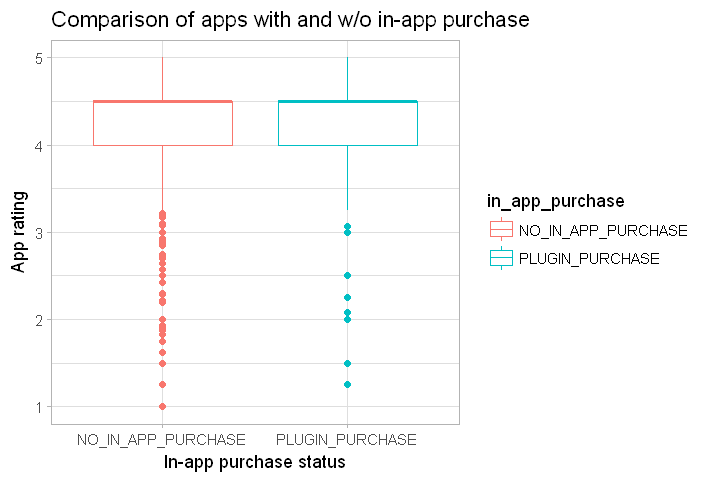

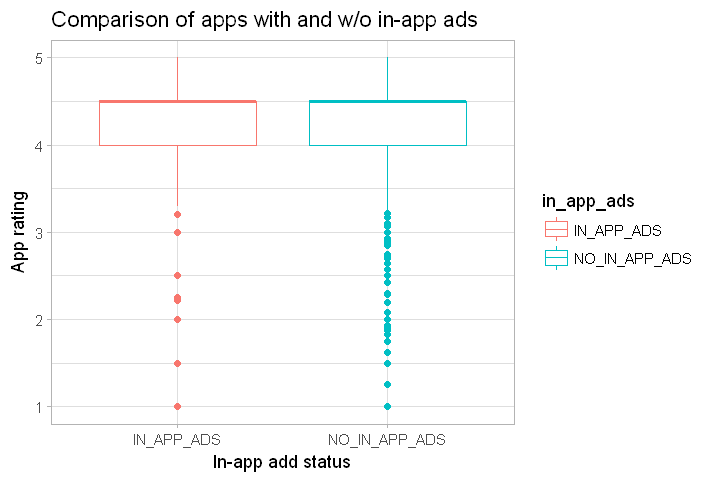

In [26]:
##### Impact of in-app purchase on average rating

Analysis_3 <- mobile_cleaned_proc[rating_mean > 0, in_app_purchase, rating_mean]

# Analysis of variance for the two groups
aov_purchase <- aov(data = Analysis_3, rating_mean ~ in_app_purchase)
summary(aov_purchase)

Analysis_3[,j = list(mean(rating_mean)), by = (in_app_purchase)]

options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(data = Analysis_3, aes(x = in_app_purchase, y = rating_mean, color = in_app_purchase)) +
  geom_boxplot() +
  ggtitle('Comparison of apps with and w/o in-app purchase') +
  ylab('App rating') +
  xlab('In-app purchase status') +
  theme_light()

# Impact of in-app ads on average rating

Analysis_4 <- mobile_cleaned_proc[rating_mean > 0, in_app_ads, rating_mean]

# Analysis of variance for the two groups
aov_ads <- aov(data = Analysis_4, rating_mean ~ in_app_ads)
summary(aov_ads)

Analysis_4[,j = list(mean(rating_mean)), by = (in_app_ads)]

options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(data = Analysis_4, aes(x = in_app_ads, y = rating_mean, color = in_app_ads)) +
  geom_boxplot() +
  ggtitle('Comparison of apps with and w/o in-app ads') +
  ylab('App rating') +
  xlab('In-app add status') +
  theme_light()


<h4><i>Interpretation of approach 5</i></h4>

1. In case of in-app purchase the p value is extremely high hence we cannot conclude that the rating is dependent on the app having in-app purchase
2. The p values from the anova for in-app advertisement (table 2)  indicates that the apps with ads have higher ratings (which is counterintuitive)

<h4><i>Conclusion from approach 5</i></h4>
From the above analysis we can determine that the presence of in-app ads and purchases does not hurt the rating of an app. This means by offering an app at a lower price point, the potential lost revenue could be regained by having advertisements or in-app purchases.

<h5>Potential drawbacks:</h5>
1. We do not know the details of how the in-app adds are displayed (intermittently, as a pop up ad etc.) which can affect user experaince and be a significant driver of user rating
2. We have no visibility to costs associated with the in-app purchase